In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
dataset=pd.read_csv("C:/Users/Manidhar/Desktop/MINIPROJECT/uci-secom.csv")
dataset=dataset.loc[:,'1':'589']
dataset.info()
sum1=dataset.sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 589 entries, 1 to 589
dtypes: float64(589)
memory usage: 7.0 MB


In [38]:
lis=[]
for i in range(0,589):
    if(sum1[i]==0):
        lis.append(str(i+1))

In [39]:
print(lis)

['13', '52', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 589 entries, 1 to 589
dtypes: float64(589)
memory usage: 7.0 MB


In [41]:
dataset.drop(lis, 1, inplace=True)

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 477 entries, 1 to 589
dtypes: float64(477)
memory usage: 5.7 MB


In [43]:
dataset=dataset.fillna(dataset.mean())
dataset.to_csv('preprocessed123.csv')

In [44]:
data=pd.read_csv("C:/Users/Manidhar/Desktop/MINIPROJECT/uci-secom.csv")

In [45]:
data=data['Pass/Fail']
dataset = np.float32(dataset)

In [46]:
from sklearn.cross_validation import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(dataset,data,test_size=0.1,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1410, 477), (157, 477), (1410,), (157,))

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model_rf=RandomForestClassifier(n_estimators=100)


In [50]:
model_rf.fit(x_train,y_train)
y_predict_rf=model_rf.predict(x_test)
y_predict_rf.shape

(157,)

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

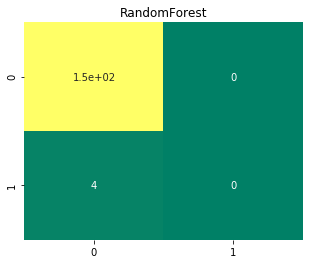

In [52]:
cm_rf=confusion_matrix(y_test,y_predict_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf,annot=True,cmap='summer',cbar=False)
plt.title('RandomForest')
plt.show()


In [53]:
cr_rt=classification_report(y_test,y_predict_rf)
print(cr_rt)

             precision    recall  f1-score   support

         -1       0.97      1.00      0.99       153
          1       0.00      0.00      0.00         4

avg / total       0.95      0.97      0.96       157



C:\Users\Manidhar\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
imp=np.argsort(model_rf.feature_importances_)
imp=imp[0:16]

In [55]:
imp=list(imp)
for i in range(len(imp)):
    imp[i]=str(imp[i])

In [56]:
print(imp)

['295', '40', '47', '191', '194', '66', '71', '391', '290', '4', '404', '215', '127', '106', '97', '432']


In [64]:
data1 = pd.read_csv("C:/Users/Manidhar/Desktop/MINIPROJECT/preprocessed123.csv")
data1=data1.loc[:,imp]
data1=data1.dropna(1)

C:\Users\Manidhar\anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [65]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data1,data,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1253, 12), (314, 12), (1253,), (314,))

In [69]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train,y_train)
y_predict_knn=model_knn.predict(x_test)

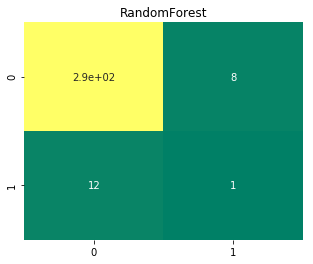

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm_knn=confusion_matrix(y_test,y_predict_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn,annot=True,cmap='summer',cbar=False)
plt.title('knn')
plt.show()

In [71]:
cr_rt=classification_report(y_test,y_predict_knn)
print(cr_rt)

             precision    recall  f1-score   support

         -1       0.96      0.97      0.97       301
          1       0.11      0.08      0.09        13

avg / total       0.93      0.94      0.93       314

